## Clase 13: Introducción a la minería de texto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud,STOPWORDS

Leer los tweets

In [2]:
df = pd.read_csv("spanish-airlines.csv")

In [3]:
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,neutral,False,0,0,Trabajar en #Ryanair como #TMA: https://t.co/r...,NaN,Fri Nov 03 12:05:12 +0000 2017,926419989107798016,NaN,Madrid
1,neutral,True,0,0,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,NaN,Sun Nov 26 18:40:28 +0000 2017,934854385577943041,NaN,Mexico City
2,negative,False,0,0,Sabiais que @Iberia te trata muy bien en santi...,NaN,Mon Dec 25 15:40:45 +0000 2017,945318406441635840,NaN,Madrid
3,negative,False,0,0,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,NaN,Mon Nov 06 14:18:35 +0000 2017,927540721296568320,NaN,Pacific Time (US & Canada)
4,positive,True,0,0,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,NaN,Mon Jan 01 23:00:57 +0000 2018,947965901332197376,NaN,Buenos Aires


Vamos a trabajer principalmente con los campos ```airline_sentiment``` y ```text```, indicando el sentimiento de tweet (positivo, negativo, neutro) y el texto mencionado. 

In [4]:
df = df[["airline_sentiment", "text"]]

In [5]:
df[df.airline_sentiment == "negative"]["text"].head()

2     Sabiais que @Iberia te trata muy bien en santi...
3     NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...
14    Un año de estos nos unirán con el resto de ibe...
15    @Alpaniagu Lo de ryanair es penoso...yo sólo v...
16    @Iberia Además, he intentado hacer d nuevo la ...
Name: text, dtype: object

Siempre es importante mirar los datos antes, en el texto puede ser más complicado para apoyarnos es conveniente separar en tokens y ver la frecuencia de las palabras

In [6]:
positivos = df[df['airline_sentiment'] == 'positive']
negativos = df[df['airline_sentiment'] == 'negative']

In [7]:
palabras = ' '.join(negativos['text'])
palabras = palabras.split()

In [8]:
top_10 = (pd.DataFrame({'pals': palabras}).
          groupby(['pals'])['pals'].
          count().
          sort_values(ascending = False)[:10])

<BarContainer object of 10 artists>

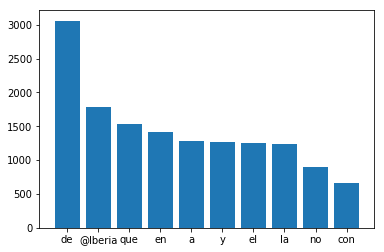

In [9]:
plt.bar(top_10.index ,top_10.values)

In [10]:
def nube_pal(texto):
    palabras = ' '.join(texto)
    wordcloud = WordCloud(background_color = "white",
                          width = 2500,
                          height = 2000
                         ).generate(palabras)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

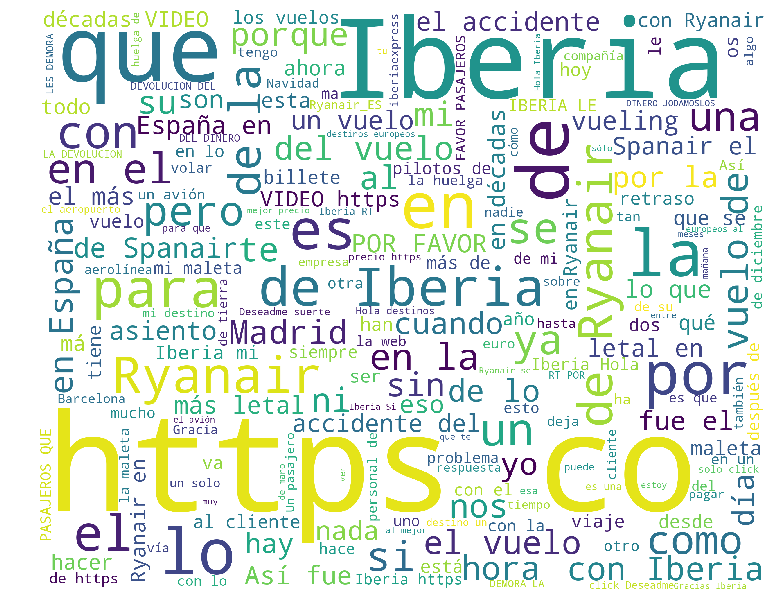

In [11]:
nube_pal(negativos['text'])

https no es algo que buscamos, en general es buena idea hacer un sondeo para eliminar palabras con algún patrón como por ejemplo # para una hashtag o bien @ para referenciar a un usuario. Se sugiere revisar con detalla las características del texto para ir removiendo la "suciedad"

In [13]:
def nube_pal(texto):
    palabras = ' '.join(texto)
    palabras_limpias = " ".join([palabra for palabra in palabras.split()
                            if 'http' not in palabra
                                and not palabra.startswith('@')
                                and not palabra.startswith('#')
                                and palabra != 'RT'
                            ])
    wordcloud = WordCloud(background_color = "white",
                          width = 2500,
                          height = 2000
                         ).generate(palabras_limpias)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

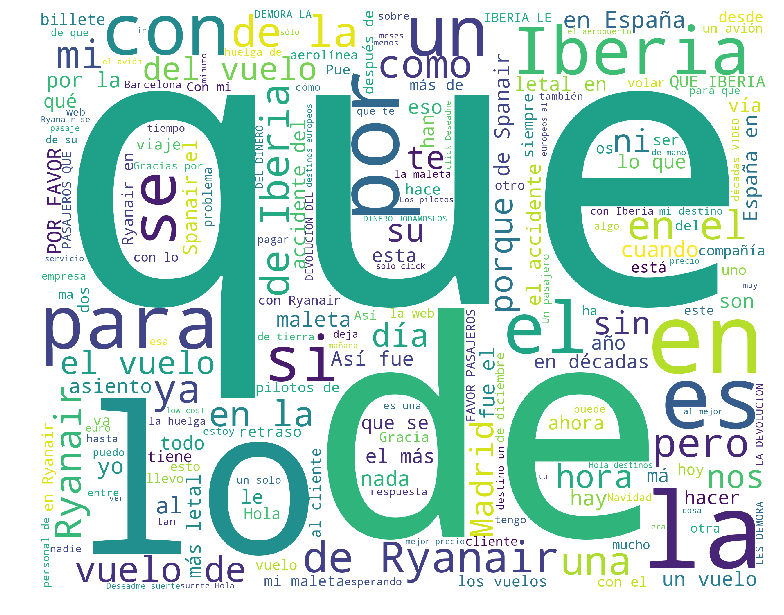

In [14]:
nube_pal(negativos['text'])

Las palabras más importantes que vemos ahora son puras stopwords, no nos sirven pues siempre son las más frecuentes, independiete del contexto. Para removerlas, NLTK cuenta con un diccionario de las mismas.

In [ ]:
nltk.download()

In [15]:
from nltk.corpus import stopwords

In [16]:
stopwds = stopwords.words('spanish')

In [17]:
stopwds

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [18]:
def nube_pal(texto):
    palabras = ' '.join(texto)
    palabras_limpias = " ".join([palabra for palabra in palabras.split()
                            if 'http' not in palabra
                                and not palabra.startswith('@')
                                and not palabra.startswith('#')
                                and palabra != 'RT'
                            ])
    wordcloud = WordCloud(stopwords = stopwds,
                          background_color = "white",
                          width = 2500,
                          height = 2000
                         ).generate(palabras_limpias)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

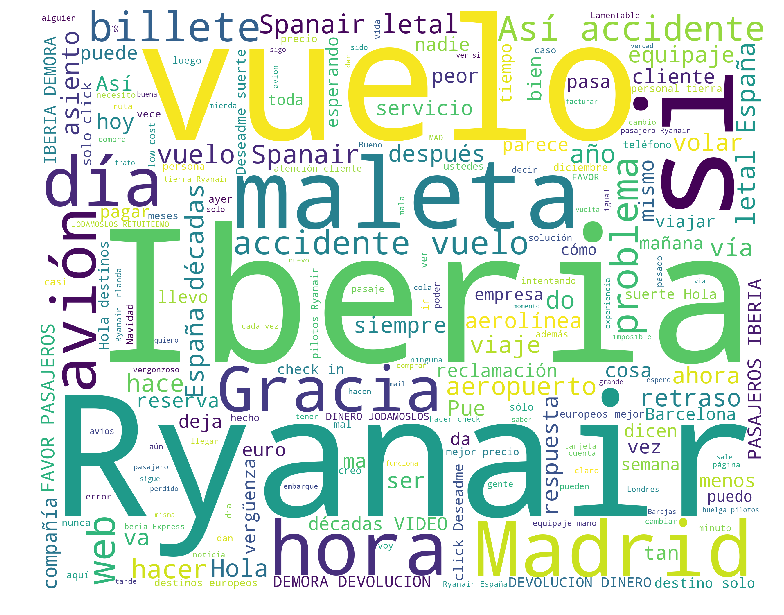

In [19]:
nube_pal(negativos['text'])

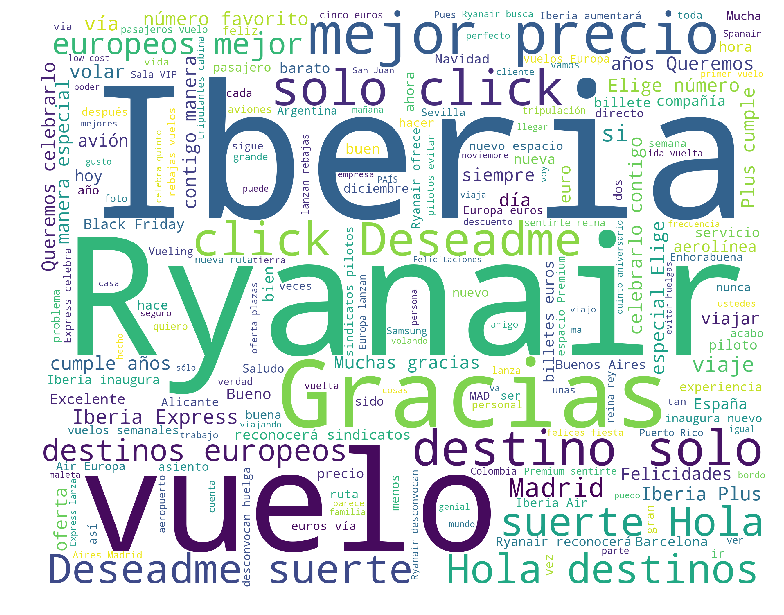

In [20]:
nube_pal(positivos['text'])

Notar que como son comentarios a dos aerolíneas, los nombres siempre aparecerán en los comentarios por lo que no apoya mucho a nuestro análisis, vamos a remover las palabras Iberia y Ryanair

In [21]:
def nube_pal(texto):
    palabras = ' '.join(texto)
    palabras_limpias = " ".join([palabra for palabra in palabras.split()
                            if 'http' not in palabra
                                and not palabra.startswith('@')
                                and not palabra.startswith('#')
                                and palabra.strip != 'RT'
                                and 'Iberia' not in palabra.strip()
                                and 'Ryanair' not in palabra.strip()
                            ])
    wordcloud = WordCloud(stopwords = stopwds,
                          background_color = "white",
                          width = 2500,
                          height = 2000
                         ).generate(palabras_limpias)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

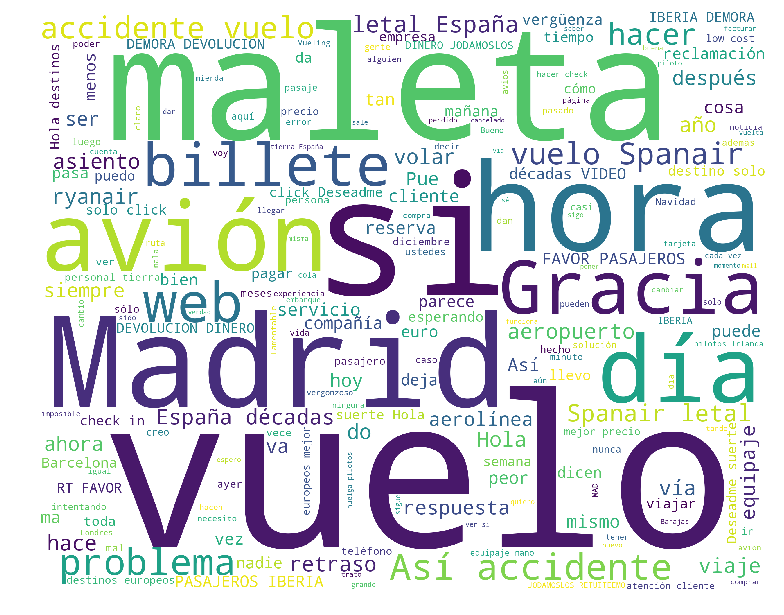

In [22]:
nube_pal(negativos['text'])

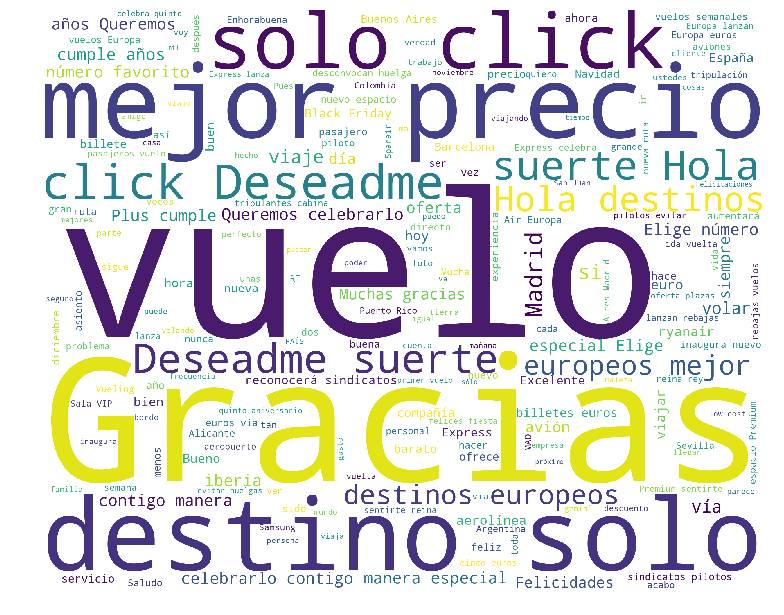

In [23]:
nube_pal(positivos['text'])

Algunas observaciones

* La maleta y Madrid están relacionados con comentarios negativos asi como comentarios relativos a la hora.
* Las palabras click, gracias, precio y destino están asociadas a los comentarios positivos
* La palabra vuelo es indistinta a los dos tipos de comentarios

### TF-IDF

A pesar de poder hacerce de forma bastante manual, sklearn tiene incorporado un método para esto

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfvec = TfidfVectorizer()
tf_p = tfvec.fit_transform(df[df['airline_sentiment'] == 'positive'].text)

In [26]:
nombres = tfvec.get_feature_names()

In [27]:
listado = pd.DataFrame({'palabra': nombres, 'tfidf': tfvec.idf_})

Estas palabras son poco relevantes, tienen tf-idf bajo, aparece el nombre de la aerolínea y preposiciones

In [28]:
listado.sort_values(['tfidf']).head(10)

,palabra,tfidf
2378,https,1.373108
1067,co,1.373108
2426,iberia,1.395781
1374,de,1.835732
1707,en,2.278253
4149,ryanair,2.412129
1142,con,2.423209
2742,la,2.560328
4755,un,2.664624
1646,el,2.697060


Estas palabras aparecen con mayor relavancia, se deben analizar más en detalle los tweets que contienen esas palabras. En general un tfidf muy elevado, sobre 7 puede representar palabras que aparecen en muy pocos documentos.

In [31]:
listado[listado.tfidf < 7].sort_values(['tfidf'], ascending = False).head(10)

,palabra,tfidf
2506,información,6.920237
1248,costo,6.920237
4038,remodelada,6.920237
3063,meses,6.920237
1951,farodevigo,6.920237
1155,confianza,6.920237
1947,fan,6.920237
1195,contenidos,6.920237
1198,contestar,6.920237
3997,recuerda,6.920237


### Análisis básico de sentimiento.
Al igual que en otros problemas que hemos tratado, nos dejaremos un conjunto de train y test y también balancearemos la muestra.

In [32]:
from sklearn.model_selection import train_test_split
df = df[df.airline_sentiment != "neutral"]
train, test = train_test_split(df, test_size = 0.3)

In [33]:
train.groupby(['airline_sentiment']).count()

,text
airline_sentiment,
negative,2629
positive,1051


In [34]:
pos = train[train.airline_sentiment == "positive"]
neg = train[train.airline_sentiment == "negative"].sample(pos.shape[0])

In [35]:
train = pd.concat([pos, neg])

In [36]:
import unidecode
import string
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
tweets = []

def tokenizador(texto):
    filtro_cortas = [e.lower() for e in texto.split() if len(e) >= 3]
    filtro_internet = [word for word in filtro_cortas
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT' 
        and 'Iberia' not in word.strip()
        and 'Ryanair' not in word.strip()]
    filtro_numeros = [word for word in filtro_internet if not word.isdigit()]
    filtro_puntuacion = [word.translate(str.maketrans('', '', string.punctuation)) for word in filtro_numeros]
    filtro_stopwords = [word for word in filtro_puntuacion if not word in stopwds]
    filtro_acentos = [unidecode.unidecode(word) for word in filtro_stopwords]
    stemmed = [stemmer.stem(word) for word in filtro_acentos]
    return stemmed


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenizador,
                lowercase = True,
                max_features = 500)

In [38]:
vectorizador = vectorizer.fit(train['text'])
X = vectorizador.transform(train['text'])
X_te = vectorizador.transform(test['text'])
y = (train["airline_sentiment"] == "positive") * 1
y_te = (test["airline_sentiment"] == "positive") * 1

In [ ]:
X

In [39]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn import metrics

Dado el sparcity, lo recomendable es muchos árboles para tener robustez, y un podado agresivo para evitar sobreajustes.

In [44]:
mi_modelo = rfc(n_estimators = 500, max_depth = 10).fit(X, y)

In [45]:
preds = mi_modelo.predict(X_te)
preds_tr  = mi_modelo.predict(X)
print("==================================")
print("Train")
print(metrics.accuracy_score(y, preds_tr))
print("==================================")
print("Test")
print(metrics.accuracy_score(y_te, preds))

Train
0.7835394862036156
Test
0.7731305449936628


### Ejemplo LSA

In [46]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components = 10
                        )
svd_model.fit(tf_p)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0)

In [47]:
terms = tfvec.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terminos = zip(terms, comp)
    terminos_ord = sorted(terminos, key= lambda x:x[1], reverse=True)[:5]
    print("Tópico "+str(i)+": ")
    for t in terminos_ord:
        print(t[0])

Tópico 0: 
79
click
deseadme
europeos
destinos
Tópico 1: 
de
iberia
https
co
en
Tópico 2: 
celebrarlo
favorito
elige
queremos
cumple
Tópico 3: 
gracias
iberia
muchas
por
ya
Tópico 4: 
euros
desde
vuelos
europa
000
Tópico 5: 
ryanair
sindicatos
pilotos
los
reconocerá
Tópico 6: 
un
premium
nuevo
espacio
inaugura
Tópico 7: 
travelthursday
un
premium
que
madrid
Tópico 8: 
vuelos
europa
sus
en
2018
Tópico 9: 
madrid
travelthursday
el
en
ryanair


### Word embbedings

El archivo con los word vectors lo pueden descargar de https://fasttext.cc/docs/en/pretrained-vectors.html, contiene los word vectors con 300 características por palabras para 157 idiomas. El archivo pesa más de 4Gb, no lo carguen a menos que su computador tenga 8Gb de RAM o más.

In [48]:
from gensim.models.wrappers import FastText
wordvectors = FastText.load_fasttext_format('fasttext-sbwc.bin')

Ejemplos de buscar la palabra por concepto

In [49]:
wordvectors.most_similar_cosmul(positive = ['rey', 'mujer'], negative=['hombre'])

[('reina', 0.914152979850769),
 ('infanta', 0.8582400679588318),
 ('berenguela', 0.8470717668533325),
 ('princesa', 0.8445038199424744),
 ('consorte', 0.8355995416641235),
 ('ranavalona', 0.8260708451271057),
 ('emperatriz', 0.8247671723365784),
 ('regente', 0.8239890336990356),
 ('infantas', 0.810472846031189),
 ('adelgunda', 0.8082677721977234)]

In [50]:
wordvectors.most_similar_cosmul(positive = ['santiago', 'jamaica'], negative = ['chile'])

[('jamaicas', 0.8182583451271057),
 ('kingston', 0.7869369387626648),
 ('kingstown', 0.7854741811752319),
 ('carrandi', 0.7853919863700867),
 ('jamaican', 0.785375714302063),
 ('jamaiquino', 0.7830578684806824),
 ('betancunia', 0.7803898453712463),
 ('jamaique', 0.7768697142601013),
 ('jamaicano', 0.7748697400093079),
 ('kitts', 0.7745578289031982)]

In [51]:
wordvectors.doesnt_match(['abril', 'mayo', 'septiembre', 'martes', 'julio'])

'martes'

In [52]:
wordvectors.doesnt_match(['everton', 'cobreloa', 'huachipato', 'talca'])

'talca'

In [53]:
from numpy.linalg import norm
def cos_sim(a, b):
    return np.dot(a, b) / (norm(a) * norm(b))

In [54]:
cos_sim(wordvectors["perro"], wordvectors["salvaje"])

0.4880573

In [55]:
cos_sim(wordvectors["everton"], wordvectors["talca"])

0.47638223

In [69]:
def tokenizador_wv(texto, wordvec = wordvectors):
    filtro_cortas = [e.lower() for e in texto.split() if len(e) >= 3]
    filtro_internet = [word for word in filtro_cortas
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT'
        and 'Iberia' not in word.strip()
        and 'Ryanair' not in word.strip()]
    filtro_numeros = [word for word in filtro_internet if not word.isdigit()]
    filtro_puntuacion = [word.translate(str.maketrans('', '', string.punctuation)) for word in filtro_numeros]
    filtro_stopwords = [word for word in filtro_puntuacion if not word in stopwds]
    filtro_acentos = [unidecode.unidecode(word) for word in filtro_puntuacion]
    try:
        wv = np.mean([wordvec[word] for word in filtro_acentos], axis = 0)
    except (KeyError, ValueError):
        wv = wordvec["0"]
    if (len(wv.shape) == 0):
        wv = wordvec["0"]
    return wv


In [70]:
X_wv = np.array([tokenizador_wv(word, wordvectors) for word in train['text']])
X_te_wv = np.array([tokenizador_wv(word, wordvectors) for word in test['text']])

C:\Users\simon\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\simon\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [79]:
mi_modelo = rfc(n_estimators = 1000, max_depth = 2).fit(X_wv, y)

In [80]:
preds = mi_modelo.predict(X_te_wv)
preds_tr  = mi_modelo.predict(X_wv)
print("==================================")
print("Train")
print(metrics.accuracy_score(y, preds_tr))
print("==================================")
print("Test")
print(metrics.accuracy_score(y_te, preds))

Train
0.7345385347288297
Test
0.7332065906210393
